# Analytics

In [2]:
import pandas as pd

## 0. Preprocessing

First of all, data extracted from the corpus are preprocessed in order to build the main dataframes for the analyses. Some columns are added in order to allow better gropings and visualizations, while others are not included since their content is out of our focus.
In particular, we are not interested in charcaters' names, so, we drop the columns containing them:

In [3]:
df = pd.read_csv("results/full_corpus_results.csv", encoding="utf8")
df = df.drop(["male_characters_names", "female_characters_names", "unknown_gender_names"], axis='columns')
df

,book_title,male_characters,female_characters,none,authors_sex
0,1883_molesworth-the-boys-and-i-a-childs-story-...,4,5,0,female
1,1905_meade-a-plain-girl,17,39,2,female
2,1890_meade-the-honorable-miss-a-story-of.an-ol...,25,43,9,female
3,1856_yonge-the-daisy-chain-or-aspirations,113,71,17,female
4,1876_molesworth-carrots-just-a-little-boy,7,6,1,female
...,...,...,...,...,...
261,1910_kipling-rewards-and-fairies,127,39,16,male
262,1911_collingwood-a-middy-of-the-king-a-romance...,66,20,6,male
263,1911_collingwood-the-adventures-of-dick-maitla...,40,8,9,male
264,1912_collingwood-two-gallant-sons-of-davon-a-t...,27,8,7,male


We add some information to our dataframes. Some functions have been here defined in order to better understand the differences in terms of number of charcaters used in different books. Also the publication date and period is extracted in order to allow some specific visualizations.

In [4]:
def where_more_characters(df):
    list_for_series = []
    for idx, row in df.iterrows():
        if row["male_characters"] > row["female_characters"]:
            list_for_series.append("male")
        elif row["male_characters"] < row["female_characters"]:
            list_for_series.append("female")
        else:
            list_for_series.append("balanced")
    df["gender_of_most_numerous_characters"] = list_for_series
    return total_number_and_characters_difference(df)


def total_number_and_characters_difference(df):     #this function needs to be runned after the previous one
    tots_list = []
    diff_list = []
    for idx, row in df.iterrows():
        tots_list.append(row["male_characters"]+row["female_characters"])
        diff_list.append(abs(row["male_characters"]-row["female_characters"]))
    df["total_gendered_characters"] = tots_list
    df["difference_between_gendered_characters"] = diff_list
    return df

def publication_date(df):
    publication_dates = []
    publication_period = []
    for idx, row in df.iterrows():
        year = row["book_title"].split("_")[0]
        period = "1"+year[1]+year[2]+"0-1"+year[1]+year[2]+"9"
        publication_dates.append(year)
        publication_period.append(period)
    df["publication_period"] = publication_period    
    df["publication_year"] = publication_dates
    return df

In [5]:
where_more_characters(df)
publication_date(df)

,book_title,male_characters,female_characters,none,authors_sex,gender_of_most_numerous_characters,total_gendered_characters,difference_between_gendered_characters,publication_period,publication_year
0,1883_molesworth-the-boys-and-i-a-childs-story-...,4,5,0,female,female,9,1,1880-1889,1883
1,1905_meade-a-plain-girl,17,39,2,female,female,56,22,1900-1909,1905
2,1890_meade-the-honorable-miss-a-story-of.an-ol...,25,43,9,female,female,68,18,1890-1899,1890
3,1856_yonge-the-daisy-chain-or-aspirations,113,71,17,female,male,184,42,1850-1859,1856
4,1876_molesworth-carrots-just-a-little-boy,7,6,1,female,male,13,1,1870-1879,1876
...,...,...,...,...,...,...,...,...,...,...
261,1910_kipling-rewards-and-fairies,127,39,16,male,male,166,88,1910-1919,1910
262,1911_collingwood-a-middy-of-the-king-a-romance...,66,20,6,male,male,86,46,1910-1919,1911
263,1911_collingwood-the-adventures-of-dick-maitla...,40,8,9,male,male,48,32,1910-1919,1911
264,1912_collingwood-two-gallant-sons-of-davon-a-t...,27,8,7,male,male,35,19,1910-1919,1912


The main dataframe is now splitted in two: one dataframe for the male corpus and one for the female corpus.

In [6]:
df_m = df.query("authors_sex == 'male'")
df_f = df.query("authors_sex == 'female'")

For further analysis some more dataframes are created for book published before and after 1880.

In [7]:
df_before_1880 = df.query("publication_year < '1880'")
df_after_1880 = df.query("publication_year >= '1880'")

df_f_before_1880 = df_f.query("publication_year < '1880'")
df_f_after_1880 = df_f.query("publication_year >= '1880'")
df_m_before_1880 = df_m.query("publication_year < '1880'")
df_m_after_1880 = df_m.query("publication_year >= '1880'")

____________________

___________________

## 1. Data Analysis

### a. In how many books the number of male characters is bigger than the number of female characters? 

The data present the number of books in which male or female characters are the most numerous. Balanced books are the ones in which we identified the same number of male and female characters. Values are stored in percentage.

The following cells show, in order:
1) Data related to the whole corpus;
2) Data related to books published before 1880;
3) Data related to books published after 1880.

In [8]:
df.value_counts("gender_of_most_numerous_characters").apply(lambda x: x/len(df)*100)

gender_of_most_numerous_characters
male        68.421053
female      25.187970
balanced     6.390977
dtype: float64

In [9]:
df_before_1880.value_counts("gender_of_most_numerous_characters").apply(lambda x: x/len(df_before_1880)*100)

gender_of_most_numerous_characters
male        73.417722
female      17.721519
balanced     8.860759
dtype: float64

In [10]:
df_after_1880.value_counts("gender_of_most_numerous_characters").apply(lambda x: x/len(df_after_1880)*100)

gender_of_most_numerous_characters
male        66.310160
female      28.342246
balanced     5.347594
dtype: float64

The following cells show, in order:
1) Data related to the corpus of male authors;
2) Data related to books written by men and published before 1880;
3) Data related to books books written by men and published after 1880.

In [11]:
df_m.value_counts("gender_of_most_numerous_characters").apply(lambda x: (x/len(df_m)*100))

gender_of_most_numerous_characters
male        95.412844
balanced     2.752294
female       1.834862
dtype: float64

In [12]:
df_m_before_1880.value_counts("gender_of_most_numerous_characters").apply(lambda x: (x/len(df_m_before_1880)*100))

gender_of_most_numerous_characters
male        88.888889
balanced     8.333333
female       2.777778
dtype: float64

In [13]:
df_m_after_1880.value_counts("gender_of_most_numerous_characters").apply(lambda x: (x/len(df_m_after_1880)*100))

gender_of_most_numerous_characters
male      98.630137
female     1.369863
dtype: float64

The following cells show, in order:
1) Data related to the corpus of female authors;
2) Data related to books written by women and published before 1880;
3) Data related to books books written by women and published after 1880.

In [14]:
df_f.value_counts("gender_of_most_numerous_characters").apply(lambda x: (x/len(df_f)*100))

gender_of_most_numerous_characters
male        49.681529
female      41.401274
balanced     8.917197
dtype: float64

In [15]:
df_f_before_1880.value_counts("gender_of_most_numerous_characters").apply(lambda x: (x/len(df_f_before_1880)*100))

gender_of_most_numerous_characters
male        60.465116
female      30.232558
balanced     9.302326
dtype: float64

In [16]:
df_f_after_1880.value_counts("gender_of_most_numerous_characters").apply(lambda x: (x/len(df_f_after_1880)*100))

gender_of_most_numerous_characters
female      45.614035
male        45.614035
balanced     8.771930
dtype: float64

_________________

### b. How does the number of male and female characters vary through decades?

For each decade the number of male and female characters is presented in percentages, relatively to the whole number of charcaters for the books of each decade.

In order, it is possible to look at:
1) Data related to the whole corpus;
2) Data related to the corpus of male authors;
3) Data related to the corpus of female authors.

In [17]:
char_number_df = df[["publication_period", "male_characters", "female_characters", "none"]].sort_values(by=['publication_period']).groupby("publication_period").sum().apply(lambda x: x*100/sum(x), axis=1)
char_number_df

,male_characters,female_characters,none
publication_period,,,
1830-1839,73.053892,25.149701,1.796407
1840-1849,67.021277,28.723404,4.255319
1850-1859,67.275616,23.669579,9.054805
1860-1869,64.141414,30.934343,4.924242
1870-1879,62.630313,30.232558,7.137129
1880-1889,62.150747,28.882391,8.966862
1890-1899,55.636659,36.050284,8.313058
1900-1909,50.660793,43.045941,6.293266
1910-1919,60.598179,31.729519,7.672302


In [18]:
char_number_m = df_m[["publication_period", "male_characters", "female_characters", "none"]].sort_values(by=['publication_period']).groupby("publication_period").sum().apply(lambda x: x*100/sum(x), axis=1)
char_number_m #.plot.bar(stacked=True, figsize=(20,10), fontsize=20, rot=0)

,male_characters,female_characters,none
publication_period,,,
1830-1839,73.076923,25.000000,1.923077
1840-1849,66.863905,29.585799,3.550296
1850-1859,72.115385,17.307692,10.576923
1860-1869,69.482289,25.068120,5.449591
1870-1879,67.479675,24.119241,8.401084
1880-1889,68.994975,20.452261,10.552764
1890-1899,63.248639,25.408348,11.343013
1900-1909,67.132867,24.009324,8.857809
1910-1919,69.263158,20.421053,10.315789


In [19]:
char_number_f = df_f[["publication_period", "male_characters", "female_characters", "none"]].sort_values(by=['publication_period']).groupby("publication_period").sum().apply(lambda x: x*100/sum(x), axis=1)
char_number_f

,male_characters,female_characters,none
publication_period,,,
1830-1839,73.015873,25.396825,1.587302
1840-1849,68.421053,21.052632,10.526316
1850-1859,62.519685,29.921260,7.559055
1860-1869,59.529412,36.000000,4.470588
1870-1879,55.599214,39.096267,5.304519
1880-1889,49.632353,44.301471,6.066176
1890-1899,49.486804,44.648094,5.865103
1900-1909,44.568966,50.086207,5.344828
1910-1919,46.598639,50.000000,3.401361


__________________

### c. Which is the ratio of usage of male and female characters in the different corpora?

Here are presented the data related to the number of male and female charcaters in books written by women and men. Percentage values of each corpus have been relativized with respect to the whole number of characters used in the same corpus.

In order, we have:
1) Data related to the whole corpus;
2) Data related to the books published before 1880;
3) Data related to books published after 1880.

In [20]:
df[["authors_sex","male_characters", "female_characters", "none"]].groupby("authors_sex").sum().apply(lambda x: x*100/sum(x), axis=1) #.plot.bar(stacked=False, figsize=(20,10), fontsize=20, rot=0)

,male_characters,female_characters,none
authors_sex,,,
female,51.484614,42.846860,5.668526
male,68.006002,22.357452,9.636546


In [21]:
df_before_1880[["male_characters", "female_characters", "none", "authors_sex"]].groupby("authors_sex").sum().apply(lambda x: x*100/sum(x), axis=1) #.plot.bar(stacked=False, figsize=(20,10), fontsize=20, rot=0)

,male_characters,female_characters,none
authors_sex,,,
female,60.084797,34.039976,5.875227
male,69.530470,22.677323,7.792208


In [22]:
df_after_1880[["male_characters", "female_characters", "none", "authors_sex"]].groupby("authors_sex").sum().apply(lambda x: x*100/sum(x), axis=1) #.plot.bar(stacked=False, figsize=(20,10), fontsize=20, rot=0)

,male_characters,female_characters,none
authors_sex,,,
female,47.849462,46.569380,5.581157
male,67.242242,22.197197,10.560561


<AxesSubplot:ylabel='None'>

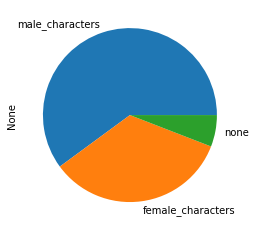

In [23]:
df_f_before_1880[["male_characters", "female_characters", "none"]].sum().plot.pie()

<AxesSubplot:ylabel='None'>

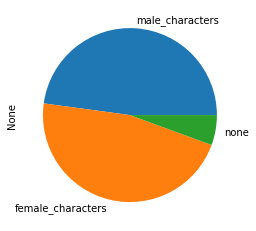

In [24]:
df_f_after_1880[["male_characters", "female_characters", "none"]].sum().plot.pie()

<AxesSubplot:ylabel='None'>

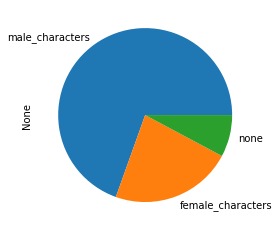

In [25]:
df_m_before_1880[["male_characters", "female_characters", "none"]].sum().plot.pie()

<AxesSubplot:ylabel='None'>

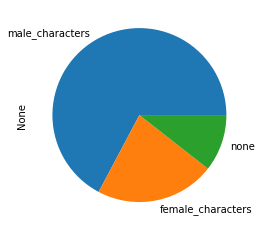

In [26]:
df_m_after_1880[["male_characters", "female_characters", "none"]].sum().plot.pie()

__________________

### d. Which is the average amount of difference between the usage of male and female charcaters in single books?

[df.gender_of_most_numerous_characters != "balanced"] excudes the rows representing books in which the charcaters are balanced

In [27]:
def get_relative_difference(dataframe):
    relative_difference = []
    for idx, row in dataframe.iterrows():
        relative_difference.append(round(row["difference_between_gendered_characters"]/row["total_gendered_characters"]*100, 2))
    dataframe["relative_difference"] = relative_difference
    return dataframe[["gender_of_most_numerous_characters", "relative_difference"]]

The relative difference on the entire corpus:

In [42]:
df_rd = get_relative_difference(df[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df.gender_of_most_numerous_characters != "balanced"][df.total_gendered_characters > 10])
print("mean:", df_rd.groupby("gender_of_most_numerous_characters").mean(), "median:", df_rd.groupby("gender_of_most_numerous_characters").median(), "std:", df_rd.groupby("gender_of_most_numerous_characters").std())
#.plot(kind="box", figsize=(20,10), fontsize=20)
#.groupby("gender_of_most_numerous_characters")

mean:                                     relative_difference
gender_of_most_numerous_characters                     
female                                        24.165000
male                                          41.550854 median:                                     relative_difference
gender_of_most_numerous_characters                     
female                                            22.65
male                                              43.05 std:                                     relative_difference
gender_of_most_numerous_characters                     
female                                        16.614710
male                                          20.913029


/var/folders/g2/90l04dz177d_r89_vtsks0jh0000gn/T/ipykernel_67392/434475098.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rd = get_relative_difference(df[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df.gender_of_most_numerous_characters != "balanced"][df.total_gendered_characters > 10])
/var/folders/g2/90l04dz177d_r89_vtsks0jh0000gn/T/ipykernel_67392/3895933635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["relative_difference"] = relative_difference


In [29]:

df_before_1880[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df_before_1880.gender_of_most_numerous_characters != "balanced"] #the rows that represent books in which charcaters are balanced are excluded
df_after_1880[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df_after_1880.gender_of_most_numerous_characters != "balanced"] #the rows that represent books in which charcaters are balanced are excluded

df_m[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df_m.gender_of_most_numerous_characters != "balanced"] #the rows that represent books in which charcaters are balanced are excluded
df_m_before_1880[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df_m_before_1880.gender_of_most_numerous_characters != "balanced"] #the rows that represent books in which charcaters are balanced are excluded
df_m_after_1880[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df_m_after_1880.gender_of_most_numerous_characters != "balanced"] #the rows that represent books in which charcaters are balanced are excluded

df_f[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df_f.gender_of_most_numerous_characters != "balanced"] #the rows that represent books in which charcaters are balanced are excluded
df_f_before_1880[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df_f_before_1880.gender_of_most_numerous_characters != "balanced"] #the rows that represent books in which charcaters are balanced are excluded
df_f_after_1880[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df_f_after_1880.gender_of_most_numerous_characters != "balanced"] #the rows that represent books in which charcaters are balanced are excluded

,gender_of_most_numerous_characters,difference_between_gendered_characters,total_gendered_characters
0,female,1,9
1,female,22,56
2,female,18,68
5,male,7,15
6,male,5,43
...,...,...,...
145,male,4,12
146,male,6,12
151,female,12,26
152,female,2,42


In [30]:
an_df = df_f_after_1880[["gender_of_most_numerous_characters", "difference_between_gendered_characters", "total_gendered_characters"]][df_f_after_1880.gender_of_most_numerous_characters != "balanced"] #the rows that represent books in which charcaters are balanced are excluded


#an_df.groupby("gender_of_most_numerous_characters").mean()